## From lecture 3

In [6]:
import pandas as pd # 輸入
import numpy as np
insurance = pd.read_csv("data/lec03-insurance.csv") # 資料夾 data 下 insurance.csv

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    # to make this notebook's output identical at every run
    np.random.seed(42)  
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(insurance, 0.2)
train_set.info()

FileNotFoundError: [Errno 2] No such file or directory: 'data/lec03-insurance.csv'

In [534]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 764 to 543
Data columns (total 7 columns):
age         267 non-null int64
sex         267 non-null object
bmi         267 non-null float64
children    267 non-null int64
smoker      267 non-null object
region      267 non-null object
charges     267 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 16.7+ KB


# 4.1 Discover (發現) and Visualize (視覺化) the Data to Gain Insights (洞察)

In [535]:
train_set.head(2)

,age,sex,bmi,children,smoker,region,charges
846,51,female,34.20,1,no,southwest,9872.7010
560,46,female,19.95,2,no,northwest,9193.8385


In [536]:
insurance = train_set.copy()
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
846,51,female,34.20,1,no,southwest,9872.7010
560,46,female,19.95,2,no,northwest,9193.8385


# 4.1.1 Single variable (單變量)

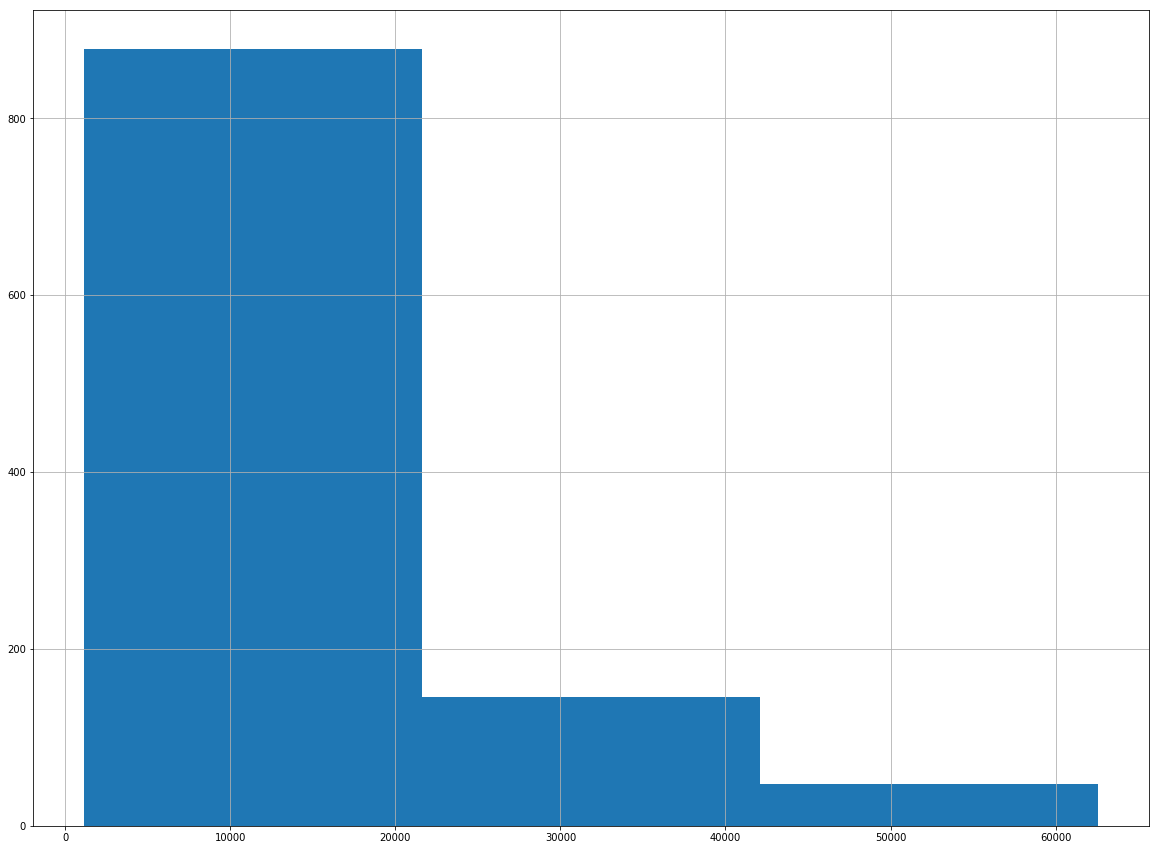

In [537]:
import matplotlib.pyplot as plt
insurance.charges.hist(bins = 3, figsize=(20,15))
plt.savefig("data//charges")
plt.show()

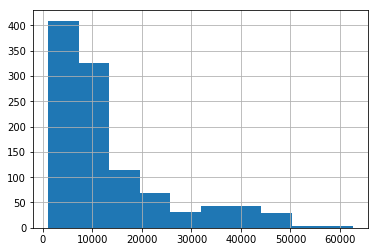

In [538]:
insurance.charges.hist(bins = 10)
plt.show()

In [539]:
insurance.charges.min(), insurance.charges.max()

(1121.8739, 62592.87309)

In [540]:
insurance.charges.describe()

count     1071.000000
mean     13342.846610
std      12014.361680
min       1121.873900
25%       4900.581475
50%       9583.893300
75%      16717.010750
max      62592.873090
Name: charges, dtype: float64

# 4.1.2 Looking for Correlations (尋找相關性)

In [541]:
corr_matrix = insurance.corr()
corr_matrix 

,age,bmi,children,charges
age,1.000000,0.119908,0.060911,0.281396
bmi,0.119908,1.000000,-0.005760,0.198274
children,0.060911,-0.005760,1.000000,0.071906
charges,0.281396,0.198274,0.071906,1.000000


In [542]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.281396
bmi         0.198274
children    0.071906
Name: charges, dtype: float64

In [543]:
corr_matrix["charges"].sort_values()

children    0.071906
bmi         0.198274
age         0.281396
charges     1.000000
Name: charges, dtype: float64

## Histograms (直方圖)

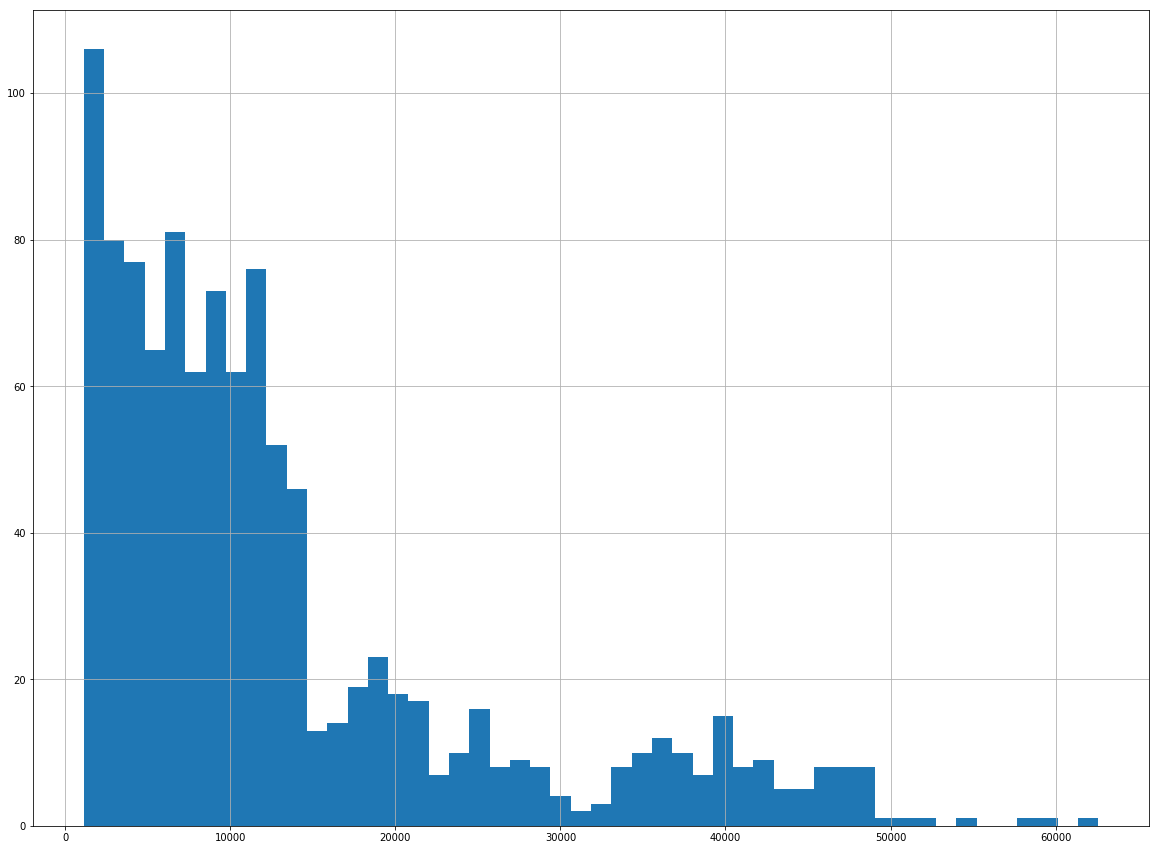

In [544]:
import matplotlib.pyplot as plt
insurance.charges.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
# %matplotlib inline
import matplotlib.pyplot as plt
insurance.hist(bins=50, figsize=(20,15))
plt.savefig("data/insurance hist")
plt.show()

NameError: name 'insurance' is not defined

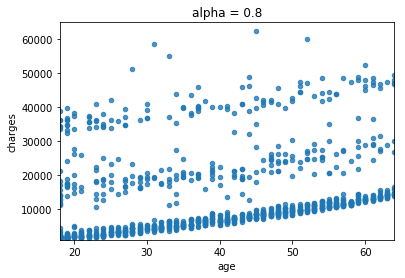

In [546]:
insurance.plot(kind="scatter", x="age", y="charges", alpha = 0.8)
plt.axis([18, 64, 1000, 65000])
plt.title('alpha = 0.8')
plt.savefig("data/age_vs_charges_scatterplot_8")
plt.show()

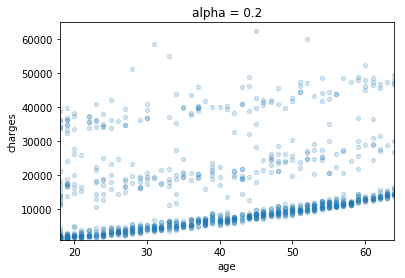

In [547]:
insurance.plot(kind="scatter", x="age", y="charges", alpha= 0.2)
plt.axis([18, 64, 1000, 65000])
plt.title('alpha = 0.2')
plt.savefig("data/age_vs_charges_scatterplot_2")
plt.show()

In [548]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
846,51,female,34.20,1,no,southwest,9872.70100
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780


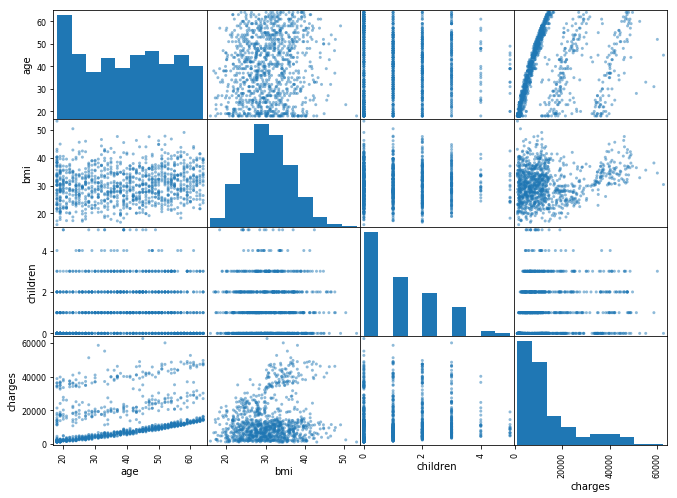

In [549]:
from pandas.plotting  import scatter_matrix

attributes = ["age", "bmi", "children" , "charges"]
scatter_matrix(insurance[attributes], figsize=(11, 8))
plt.savefig("data/scatter_matrix_plot")
plt.show()

# 4.4 Prepare the Data for Machine Learning Algorithms (機器學習演算法)

In [3]:
insurance.head()

NameError: name 'insurance' is not defined

In [551]:
insurance.describe()

,age,bmi,children,charges
count,1071.00000,1070.000000,1071.000000,1071.000000
mean,39.36788,30.568210,1.107376,13342.846610
std,14.07188,6.042681,1.215420,12014.361680
min,18.00000,15.960000,0.000000,1121.873900
25%,27.00000,26.220000,0.000000,4900.581475
50%,40.00000,30.230000,1.000000,9583.893300
75%,51.00000,34.496250,2.000000,16717.010750
max,64.00000,53.130000,5.000000,62592.873090


In [2]:
insurance = train_set.drop("charges", axis=1)
insurance_labels = train_set["charges"].copy()

NameError: name 'train_set' is not defined

In [553]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 846 to 1126
Data columns (total 6 columns):
age         1071 non-null int64
sex         1070 non-null object
bmi         1070 non-null float64
children    1071 non-null int64
smoker      1071 non-null object
region      1071 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 58.6+ KB


In [554]:
insurance.head(2)

,age,sex,bmi,children,smoker,region
846,51,female,34.20,1,no,southwest
560,46,female,19.95,2,no,northwest


In [555]:
insurance_labels.describe()

count     1071.000000
mean     13342.846610
std      12014.361680
min       1121.873900
25%       4900.581475
50%       9583.893300
75%      16717.010750
max      62592.873090
Name: charges, dtype: float64

In [556]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 846 to 1126
Data columns (total 6 columns):
age         1071 non-null int64
sex         1070 non-null object
bmi         1070 non-null float64
children    1071 non-null int64
smoker      1071 non-null object
region      1071 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 58.6+ KB


In [557]:
insurance_labels.head(2)

846    9872.7010
560    9193.8385
Name: charges, dtype: float64

# 4.2.1 Dealing with missing Data

In [558]:
import pandas as pd
insurance5 = pd.read_excel('data/lec03-insurance-5.xlsx') 
insurance5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0.0,yes,southwest,16884.92400
1,18,NaN,33.77,1.0,no,NaN,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,NaN,NaN,no,northwest,28923.13692
4,25,NaN,26.22,0.0,NaN,northeast,2721.32080


## (1) Delete

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [559]:
insurance5.dropna()

,age,sex,bmi,children,smoker,region,charges
2,37,male,29.83,2.0,no,northeast,6406.4107


In [560]:
insurance5.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2 to 2
Data columns (total 7 columns):
age         1 non-null int64
sex         1 non-null object
bmi         1 non-null float64
children    1 non-null float64
smoker      1 non-null object
region      1 non-null object
charges     1 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 64.0+ bytes


* ‘all’ : If all values are NA, drop that row or column.

In [561]:
insurance5.dropna(how = 'all')

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0.0,yes,southwest,16884.92400
1,18,NaN,33.77,1.0,no,NaN,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,NaN,NaN,no,northwest,28923.13692
4,25,NaN,26.22,0.0,NaN,northeast,2721.32080


## (2) Replace with summary

In [562]:
insurance5.bmi 

0      NaN
1    33.77
2    29.83
3      NaN
4    26.22
Name: bmi, dtype: float64

In [563]:
insurance5.bmi.mean()

29.939999999999998

In [564]:
insurance5.sex.mode()

0    female
dtype: object

In [565]:
insurance5.sex.mode()[0]

'female'

google fillna multiple columns

* https://stackoverflow.com/questions/34913590/fillna-in-multiple-columns-in-place-in-python-pandas
* https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.dtype.kind.html
* https://www.w3schools.com/python/python_lambda.asp

In [566]:
insurance5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0.0,yes,southwest,16884.92400
1,18,NaN,33.77,1.0,no,NaN,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,NaN,NaN,no,northwest,28923.13692
4,25,NaN,26.22,0.0,NaN,northeast,2721.32080


In [567]:
insurance5.fillna(insurance5.mode().iloc[0])

,age,sex,bmi,children,smoker,region,charges
0,19,female,26.22,0.0,yes,southwest,16884.92400
1,18,female,33.77,1.0,no,northeast,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,26.22,0.0,no,northwest,28923.13692
4,25,female,26.22,0.0,no,northeast,2721.32080


In [568]:
insurance5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0.0,yes,southwest,16884.92400
1,18,NaN,33.77,1.0,no,NaN,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,NaN,NaN,no,northwest,28923.13692
4,25,NaN,26.22,0.0,NaN,northeast,2721.32080


In [569]:
insurance5.fillna(insurance5.median()).fillna(insurance5.mode().iloc[0])

,age,sex,bmi,children,smoker,region,charges
0,19,female,29.83,0.0,yes,southwest,16884.92400
1,18,female,33.77,1.0,no,northeast,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,29.83,0.5,no,northwest,28923.13692
4,25,female,26.22,0.0,no,northeast,2721.32080


## (3) Random replace

In [570]:
import pandas as pd # 輸入
insurance = pd.read_csv('data/lec03-insurance.csv')  # 資料夾 data 下 housing.csv
insurance.bmi.describe()

count    1337.000000
mean       30.667004
std         6.099040
min        15.960000
25%        26.315000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [571]:
insurance.bmi.min(), insurance.bmi.max()

(15.96, 53.13)

In [572]:
insurance.bmi.min().round(), insurance.bmi.max().round()

(16.0, 53.0)

In [573]:
import random
random.randrange(insurance.bmi.min().round(), insurance.bmi.max().round())

44

In [574]:
insurance5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0.0,yes,southwest,16884.92400
1,18,NaN,33.77,1.0,no,NaN,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,NaN,NaN,no,northwest,28923.13692
4,25,NaN,26.22,0.0,NaN,northeast,2721.32080


google random element fillna

* https://stackoverflow.com/questions/47497466/python-fill-na-in-pandas-column-with-random-elements-from-a-list
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html

In [575]:
insurance.region.astype('category').values.categories

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')

In [576]:
insurance.region.astype('category').values.categories[1]

'northwest'

In [577]:
region_cat = insurance.region.astype('category').values.categories

In [578]:
import numpy as np
np.random.choice(region_cat), np.random.choice(region_cat), np.random.choice(region_cat)

('southwest', 'northwest', 'southwest')

# 4.2.2 Managing categorical data (類別資料)

* https://scikit-learn.org/stable/modules/preprocessing.html: The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. 

In [579]:
insurance_labels.head()

846      9872.70100
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
Name: charges, dtype: float64

In [580]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,NaN,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [581]:
insurance.region.astype('category').values.categories

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')

In [582]:
insurance.region[0] 

'southwest'

In [583]:
insurance5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0.0,yes,southwest,16884.92400
1,18,NaN,33.77,1.0,no,NaN,1725.55230
2,37,male,29.83,2.0,no,northeast,6406.41070
3,60,female,NaN,NaN,no,northwest,28923.13692
4,25,NaN,26.22,0.0,NaN,northeast,2721.32080


In [584]:
insurance5.region[0] # The first element

'southwest'

In [585]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
insurance_cat = insurance["region"]
insurance_cat_encoded = encoder.fit_transform(insurance_cat)
print(encoder.classes_)
print(insurance_cat_encoded)

['northeast' 'northwest' 'southeast' 'southwest']
[3 2 2 ... 2 3 1]


In [586]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
insurance_cat = insurance["region"]
insurance_cat_1hot = encoder.fit_transform(insurance_cat)
insurance_cat_1hot

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [587]:
insurance_cat_1hot_df = pd.DataFrame(insurance_cat_1hot, columns = encoder.classes_)
insurance_cat_1hot_df.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


# 4.4.3 Data scaling and normalization (資料縮放與正規化)

* 以 column 為依據

In [588]:
import numpy as np
x = np.array([[1, 2],[2, 6], [6, 1]])
x

array([[1, 2],
       [2, 6],
       [6, 1]])

In [589]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
scaled_data = ss.fit_transform(x)
scaled_data

C:\Users\PHD\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0. , 0.2],
       [0.2, 1. ],
       [1. , 0. ]])

In [590]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_data = ss.fit_transform(x)
scaled_data

C:\Users\PHD\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\PHD\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.9258201 , -0.46291005],
       [-0.46291005,  1.38873015],
       [ 1.38873015, -0.9258201 ]])

# 4.2.4 Size of Data Frame

In [591]:
import pandas as pd # 輸入
import numpy as np
insurance = pd.read_csv("data/lec03-insurance.csv") # 資料夾 data 下 insurance.csv

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    # to make this notebook's output identical at every run
    np.random.seed(42)  
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(insurance, 0.2)
insurance = train_set.drop("charges", axis=1)
insurance_labels = train_set["charges"].copy()

In [592]:
insurance.head()

,age,sex,bmi,children,smoker,region
846,51,female,34.20,1,no,southwest
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast


In [593]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 846 to 1126
Data columns (total 6 columns):
age         1071 non-null int64
sex         1070 non-null object
bmi         1070 non-null float64
children    1071 non-null int64
smoker      1071 non-null object
region      1071 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 58.6+ KB


In [594]:
insurance = insurance.reset_index(drop=True)
insurance.head() 

,age,sex,bmi,children,smoker,region
0,51,female,34.20,1,no,southwest
1,46,female,19.95,2,no,northwest
2,47,female,24.32,0,no,northeast
3,52,female,24.86,0,no,southeast
4,39,female,34.32,5,no,southeast


## Replace with summary  (替換為摘要) 

In [595]:
insurance = insurance.fillna(insurance.median()).fillna(insurance.mode().iloc[0])
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 6 columns):
age         1071 non-null int64
sex         1071 non-null object
bmi         1071 non-null float64
children    1071 non-null int64
smoker      1071 non-null object
region      1071 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 50.3+ KB


## 數值資料 3 個

* google pandas drop many columns
    * https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names-in-pandas

In [596]:
insurance_num = insurance.drop(['sex', 'smoker', 'region'], axis=1)
insurance_num.head()

,age,bmi,children
0,51,34.20,1
1,46,19.95,2
2,47,24.32,0
3,52,24.86,0
4,39,34.32,5


# Handling Text and Categorical Attributes

* 2 classes
    * https://stackoverflow.com/questions/31947140/sklearn-labelbinarizer-returns-vector-when-there-are-2-classes

In [597]:
insurance.head(10)

,age,sex,bmi,children,smoker,region
0,51,female,34.200,1,no,southwest
1,46,female,19.950,2,no,northwest
2,47,female,24.320,0,no,northeast
3,52,female,24.860,0,no,southeast
4,39,female,34.320,5,no,southeast
5,54,female,21.470,3,no,northwest
6,63,male,41.470,0,no,southeast
7,22,female,24.300,0,no,southwest
8,18,male,21.565,0,yes,northeast
9,40,male,41.230,1,no,northeast


In [598]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

encoder = LabelBinarizer()
sex_ohe = encoder.fit_transform(insurance["sex"])
sex_ohe  

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [599]:
encoder.classes_

array(['female', 'male'], dtype='<U6')

In [600]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

encoder = LabelBinarizer()
sex_ohe = encoder.fit_transform(insurance["sex"])
sex_ohe = np.hstack((1 - sex_ohe, sex_ohe))
sex_df = pd.DataFrame(sex_ohe, columns = encoder.classes_)
sex_df.head(10)

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [601]:
insurance.head(2)

,age,sex,bmi,children,smoker,region
0,51,female,34.20,1,no,southwest
1,46,female,19.95,2,no,northwest


In [602]:
smoker_ohe = encoder.fit_transform(insurance["smoker"])
smoker_ohe = np.hstack((1 - smoker_ohe, smoker_ohe))
smoker_df = pd.DataFrame(smoker_ohe, columns = encoder.classes_)
smoker_df.head(2)

,no,yes
0,1,0
1,1,0


In [603]:
insurance.head(2)

,age,sex,bmi,children,smoker,region
0,51,female,34.20,1,no,southwest
1,46,female,19.95,2,no,northwest


In [604]:
region_ohe = encoder.fit_transform(insurance["region"])
region_df = pd.DataFrame(region_ohe, columns = encoder.classes_)
region_df.head(2)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,1,0,0


In [605]:
insurance.head()

,age,sex,bmi,children,smoker,region
0,51,female,34.20,1,no,southwest
1,46,female,19.95,2,no,northwest
2,47,female,24.32,0,no,northeast
3,52,female,24.86,0,no,southeast
4,39,female,34.32,5,no,southeast


In [606]:
insurance_df = pd.concat([insurance_num, sex_df, smoker_df, region_df], axis=1)
insurance_df.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,51,34.20,1,1,0,1,0,0,0,0,1
1,46,19.95,2,1,0,1,0,0,1,0,0
2,47,24.32,0,1,0,1,0,1,0,0,0
3,52,24.86,0,1,0,1,0,0,0,1,0
4,39,34.32,5,1,0,1,0,0,0,1,0


In [607]:
# insurance_labels = insurance_labels.reset_index(drop=True)
insurance_labels.head() 

0     9872.70100
1     9193.83850
2     8534.67180
3    27117.99378
4     8596.82780
Name: charges, dtype: float64

# Betetr approach

* https://github.com/pandas-dev/pandas/issues/12042

In [608]:
cat_df = pd.concat([insurance["sex"], insurance["smoker"], insurance["region"]], axis=1)
cat_df.head()

,sex,smoker,region
0,female,no,southwest
1,female,no,northwest
2,female,no,northeast
3,female,no,southeast
4,female,no,southeast


In [609]:
pd.get_dummies(cat_df).head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,1,0,0,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,1,0,1,0,0,0
3,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,0


In [610]:
all_data = pd.concat([insurance_df, insurance_labels], axis=1)

In [611]:
all_data.corr()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,charges
age,1.000000,0.119711,0.060911,0.009243,-0.009243,0.052405,-0.052405,-0.020136,0.012580,-0.015524,0.023616,0.281396
bmi,0.119711,1.000000,-0.005710,-0.014016,0.014016,0.004082,-0.004082,-0.151915,-0.111766,0.246560,0.010827,0.198050
children,0.060911,-0.005710,1.000000,-0.017156,0.017156,-0.014034,0.014034,-0.004743,0.033360,-0.025079,-0.002591,0.071906
female,0.009243,-0.014016,-0.017156,1.000000,-1.000000,0.071351,-0.071351,-0.005975,-0.017572,0.007638,0.015553,-0.057049
male,-0.009243,0.014016,0.017156,-1.000000,1.000000,-0.071351,0.071351,0.005975,0.017572,-0.007638,-0.015553,0.057049
no,0.052405,0.004082,-0.014034,0.071351,-0.071351,1.000000,-1.000000,-0.011508,0.030272,-0.051720,0.034465,-0.780075
yes,-0.052405,-0.004082,0.014034,-0.071351,0.071351,-1.000000,1.000000,0.011508,-0.030272,0.051720,-0.034465,0.780075
northeast,-0.020136,-0.151915,-0.004743,-0.005975,0.005975,-0.011508,0.011508,1.000000,-0.322975,-0.345349,-0.330433,-0.000472
northwest,0.012580,-0.111766,0.033360,-0.017572,0.017572,0.030272,-0.030272,-0.322975,1.000000,-0.335870,-0.321364,-0.033618
southeast,-0.015524,0.246560,-0.025079,0.007638,-0.007638,-0.051720,0.051720,-0.345349,-0.335870,1.000000,-0.343626,0.067639


In [612]:
all_data.corr()["charges"].sort_values(ascending=False)

charges      1.000000
yes          0.780075
age          0.281396
bmi          0.198050
children     0.071906
southeast    0.067639
male         0.057049
northeast   -0.000472
northwest   -0.033618
southwest   -0.035414
female      -0.057049
no          -0.780075
Name: charges, dtype: float64

# 4.3 Select and Train a Model

* Linear Regression for training set

    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
        * If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [613]:
from sklearn.linear_model import LinearRegression
# Create a linear regressor instance
lr = LinearRegression(normalize=True)
# Train the model
lr.fit(insurance_df, insurance_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

infor 

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    * Returns the coefficient of determination R^2 of the prediction

In [614]:
print( "Score {:.4f}".format(lr.score(insurance_df, insurance_labels)) ) 

Score 0.7420


### Linear Regression Equation

In [615]:
print('y = %.3f '% lr.intercept_)
for i, c in enumerate(lr.coef_):
    print('%.3f '% c, insurance_df.columns.values[i])

y = -624.669 
256.606  age
338.995  bmi
426.727  children
5.932  female
-5.932  male
-11827.161  no
11827.161  yes
468.154  northeast
91.163  northwest
-197.367  southeast
-353.502  southwest


In [616]:
some_data = insurance_df.iloc[:4] # 4 個例子
some_labels = insurance_labels.iloc[:4]
print("Predictions:\t", lr.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [12307.89076923  7065.56550747  8327.11919265  9127.68678932]
Labels:		 [9872.701, 9193.8385, 8534.6718, 27117.99378]


## The 4th Sample

In [617]:
insurance_df.iloc[3]

age          52.00
bmi          24.86
children      0.00
female        1.00
male          0.00
no            1.00
yes           0.00
northeast     0.00
northwest     0.00
southeast     1.00
southwest     0.00
Name: 3, dtype: float64

In [618]:
insurance_labels.iloc[3]

27117.99378

In [619]:
lr.predict(insurance_df.iloc[3:5])

array([ 9127.68678932, 11132.33930596])

In [620]:
predicted_y = lr.intercept_

for i, c in enumerate(lr.coef_):
    predicted_y += c * insurance_df.iloc[3][i]
    
print('predicted y = %.3f '% predicted_y)

predicted y = 9127.687 


In [621]:
insurance_all = pd.concat([insurance_df, insurance_labels], axis=1)
insurance_all.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,charges
0,51,34.20,1,1,0,1,0,0,0,0,1,9872.70100
1,46,19.95,2,1,0,1,0,0,1,0,0,9193.83850
2,47,24.32,0,1,0,1,0,1,0,0,0,8534.67180
3,52,24.86,0,1,0,1,0,0,0,1,0,27117.99378
4,39,34.32,5,1,0,1,0,0,0,1,0,8596.82780


In [622]:
insurance_all[insurance_all.age == 52]

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,charges
3,52,24.860,0,1,0,1,0,0,0,1,0,27117.99378
20,52,41.800,2,0,1,0,1,0,0,1,0,47269.85400
111,52,30.200,1,0,1,1,0,0,0,0,1,9724.53000
229,52,31.730,2,1,0,1,0,0,1,0,0,11187.65670
319,52,47.740,1,0,1,1,0,0,0,1,0,9748.91060
338,52,33.300,2,1,0,1,0,0,0,0,1,10806.83900
417,52,36.700,0,0,1,1,0,0,0,0,1,9144.56500
428,52,38.600,2,0,1,1,0,0,0,0,1,10325.20600
516,52,36.765,2,0,1,1,0,0,1,0,0,26467.09737
572,52,34.485,3,0,1,0,1,0,1,0,0,60021.39897


In [623]:
insurance_all[(insurance_all.age == 52) & (insurance_all.female == 1) ]

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,charges
3,52,24.86,0,1,0,1,0,0,0,1,0,27117.99378
229,52,31.73,2,1,0,1,0,0,1,0,0,11187.65670
338,52,33.30,2,1,0,1,0,0,0,0,1,10806.83900
631,52,44.70,3,1,0,1,0,0,0,0,1,11411.68500
633,52,23.18,0,1,0,1,0,1,0,0,0,10197.77220
670,52,31.20,0,1,0,1,0,0,0,0,1,9625.92000
722,52,25.30,2,1,0,0,1,0,0,1,0,24667.41900
789,52,37.40,0,1,0,1,0,0,0,0,1,9634.53800
807,52,30.78,1,1,0,1,0,1,0,0,0,10797.33620


In [624]:
insurance_all[(insurance_all.age == 52) & (insurance_all.female == 1) & (insurance_all.children == 0) ]

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,charges
3,52,24.86,0,1,0,1,0,0,0,1,0,27117.99378
633,52,23.18,0,1,0,1,0,1,0,0,0,10197.77220
670,52,31.20,0,1,0,1,0,0,0,0,1,9625.92000
789,52,37.40,0,1,0,1,0,0,0,0,1,9634.53800


In [625]:
some_data = insurance_df.iloc[721:724]  
some_labels = insurance_labels.iloc[721:724]
print("Predictions:\t", lr.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 9400.4070214  33784.62199034 31812.10294507]
Labels:		 [7441.053000000001, 24667.418999999998, 55135.402089999996]


In [626]:
lr.predict(insurance_df).min(), lr.predict(insurance_df).max()

(-1960.3279647820086, 40804.71968748161)

In [627]:
from sklearn.metrics import mean_squared_error
print(np.sqrt( mean_squared_error(insurance_labels, lr.predict(insurance_df) )))

6099.432725507942


In [628]:
insurance_labels.min(), insurance_labels.max()

(1121.8739, 62592.87309)

In [629]:
lr.predict(insurance_df)

array([12307.89076923,  7065.56550747,  8327.11919265, ...,
       11427.76431201, 37338.99337168, 11438.04337196])

In [630]:
insurance_df.describe()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
count,1071.00000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.00000,1071.000000,1071.000000,1071.000000
mean,39.36788,30.567894,1.107376,0.488329,0.511671,0.794585,0.205415,0.24930,0.239029,0.264239,0.247432
std,14.07188,6.039866,1.215420,0.500097,0.500097,0.404194,0.404194,0.43281,0.426690,0.441133,0.431722
min,18.00000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27.00000,26.220000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,40.00000,30.230000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,51.00000,34.492500,2.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,64.00000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## 4.3.2 Multicollinearity (多重共線性) 

* https://www.linkedin.com/pulse/super-simple-machine-learning-multiple-linear-regression-low/

### insurance_new_df

In [631]:
cat_df.head(2)

,sex,smoker,region
0,female,no,southwest
1,female,no,northwest


In [632]:
cat_df.index

RangeIndex(start=0, stop=1071, step=1)

In [633]:
new_df = pd.DataFrame(index = cat_df.index)
for i in cat_df:
    new_df = new_df.join(pd.get_dummies(cat_df[i]).iloc[:, 1:])

new_df.head()

,male,yes,northwest,southeast,southwest
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [634]:
insurance_new_df = pd.concat([insurance_num, new_df], axis=1)
insurance_new_df.head()

,age,bmi,children,male,yes,northwest,southeast,southwest
0,51,34.20,1,0,0,0,0,1
1,46,19.95,2,0,0,1,0,0
2,47,24.32,0,0,0,0,0,0
3,52,24.86,0,0,0,0,1,0
4,39,34.32,5,0,0,0,1,0


In [635]:
lr2 = LinearRegression(normalize=True)
# Train the model
lr2.fit(insurance_new_df, insurance_labels)
print( "Score {:.4f}".format(lr2.score(insurance_new_df, insurance_labels)) ) 

Score 0.7420


In [636]:
print('y = %.3f '% lr2.intercept_)
for i, c in enumerate(lr2.coef_):
    print('%.3f '% c, insurance_new_df.columns.values[i])

y = -11977.744 
256.606  age
338.995  bmi
426.727  children
-11.864  male
23654.323  yes
-376.992  northwest
-665.521  southeast
-821.656  southwest


## 手動 StandardScaler , normalize= False 

In [637]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data2 = ss.fit_transform(insurance_new_df)

lr5 = LinearRegression(normalize= False)
lr5.fit(scaled_data2, insurance_labels)
print('y = %.3f '% lr5.intercept_)
for i, c in enumerate(lr5.coef_):
    print('%.3f '% c, insurance_new_df.columns.values[i])

y = 13342.847 
3609.246  age
2046.531  bmi
518.410  children
-5.931  male
9556.463  yes
-160.783  northwest
-293.446  southeast
-354.561  southwest


# 4.3.2 Evaluating model performance

* google significance linear regression python
    * https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression/27928411

In [1]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
scaled_data2 = ss2.fit_transform(insurance_new_df)

NameError: name 'insurance_new_df' is not defined

In [639]:
import statsmodels.api as sm
#from scipy import stats

X2 = sm.add_constant(scaled_data2)
est = sm.OLS(insurance_labels, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     381.8
Date:                Sun, 20 Jan 2019   Prob (F-statistic):          3.67e-306
Time:                        14:39:26   Log-Likelihood:                -10854.
No. Observations:                1071   AIC:                         2.173e+04
Df Residuals:                    1062   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    187.166     71.289      0.0

# 4.3.3 Backward selection (向後選擇) 

In [640]:
insurance_df.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,51,34.20,1,1,0,1,0,0,0,0,1
1,46,19.95,2,1,0,1,0,0,1,0,0
2,47,24.32,0,1,0,1,0,1,0,0,0
3,52,24.86,0,1,0,1,0,0,0,1,0
4,39,34.32,5,1,0,1,0,0,0,1,0


In [641]:
insurance_back = insurance_df.drop(['female', 'male', 'no', 'northeast', 'northwest', 'southeast', 'southwest'], axis=1)
insurance_back.head()

,age,bmi,children,yes
0,51,34.20,1,0
1,46,19.95,2,0
2,47,24.32,0,0
3,52,24.86,0,0
4,39,34.32,5,0


In [642]:
from sklearn.preprocessing import StandardScaler
ss6 = StandardScaler()
scaled_data6 = ss6.fit_transform(insurance_back)
lr6 = LinearRegression()
# Train the model
lr6.fit(scaled_data6, insurance_labels)
print( "Score {:.4f}".format(lr6.score(scaled_data6, insurance_labels)) ) 
print('y = %.3f '% lr6.intercept_)
for i, c in enumerate(lr6.coef_):
    print('%.3f '% c, insurance_back.columns.values[i])

Score 0.7414
y = 13342.847 
3610.375  age
1988.111  bmi
520.803  children
9557.737  yes


In [643]:
from sklearn.metrics import mean_squared_error
print(np.sqrt( mean_squared_error(insurance_labels, lr6.predict(scaled_data6) )))

6107.166690520324


In [644]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

ss4 = StandardScaler()
scaled_data4 = ss.fit_transform(insurance_back)


X4 = sm.add_constant(scaled_data4)
est = sm.OLS(insurance_labels, X4)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     763.9
Date:                Sun, 20 Jan 2019   Prob (F-statistic):          3.62e-311
Time:                        14:39:26   Log-Likelihood:                -10856.
No. Observations:                1071   AIC:                         2.172e+04
Df Residuals:                    1066   BIC:                         2.175e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    187.051     71.332      0.0

In [645]:
est2.params

const    13342.846610
x1        3610.374654
x2        1988.111022
x3         520.802641
x4        9557.736790
dtype: float64

In [646]:
est2.params[2]

1988.1110215278613

In [647]:
insurance_back.iloc[3]

age         52.00
bmi         24.86
children     0.00
yes          0.00
Name: 3, dtype: float64

In [648]:
predicted_y = est2.params[0]

for i, c in enumerate(est2.params):
    if i == 0:
        predicted_y = est2.params[0]
    else: 
        predicted_y += c * insurance_back.iloc[3][i-1]
    
print('predicted y = %.3f '% predicted_y)

predicted y = 250506.769 


In [649]:
est2.params[0] + insurance_back.iloc[3][0] * est2.params[1] + insurance_back.iloc[3][1] * est2.params[2] 

250506.7686034246

# coefficients are different by using 2 methods

* solve the normal equation $\theta = (X^T X)^{-1} X^T y$ in lecture 5

In [650]:
X = insurance_back.values
y = insurance_labels.values
scaled_data = ss.fit_transform(X)

X_b = np.c_[np.ones((insurance_back.shape[0], 1)), scaled_data]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
 
theta_best

array([13342.84660963,  3610.37465382,  1988.11102153,   520.80264097,
        9557.73679047])

In [651]:
import numpy
numpy.linalg.eig(X_b.T.dot(X_b))

(array([1071.        ,  913.16492818, 1222.57972216, 1061.0065738 ,
        1087.24877586]),
 array([[ 1.00000000e+00,  1.96022167e-15, -3.00838488e-15,
         -4.47190358e-14, -1.33858823e-14],
        [-4.75390917e-15,  6.98756906e-01, -7.12970420e-01,
         -4.03543219e-02,  4.22314389e-02],
        [ 2.19622867e-14, -5.73301489e-01, -6.00048240e-01,
          5.43747768e-01, -1.24923489e-01],
        [-1.01823473e-14, -3.36216674e-01, -2.57269835e-01,
         -4.58940635e-01,  7.81117196e-01],
        [ 3.97900109e-14,  2.64617719e-01,  2.55788041e-01,
          7.01486555e-01,  6.10300380e-01]]))

In [652]:
X = insurance_new_df.values
y = insurance_labels.values
scaled_data = ss.fit_transform(X)

X_b2 = np.c_[np.ones((insurance_new_df.shape[0], 1)), scaled_data]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b2.T.dot(X_b2)).dot(X_b2.T).dot(y)
 
theta_best

array([ 1.33428466e+04,  3.60924577e+03,  2.04653121e+03,  5.18410364e+02,
       -5.93060397e+00,  9.55646269e+03, -1.60783284e+02, -2.93446317e+02,
       -3.54561050e+02])

In [653]:
import numpy
numpy.linalg.eig(X_b2.T.dot(X_b2))

(array([ 343.13233839, 1071.        , 1596.27034626, 1427.27062026,
         854.81586368,  966.11873563, 1033.27886998, 1205.01706679,
        1142.09615901]),
 array([[-1.14451796e-16,  1.00000000e+00, -1.08952140e-15,
          2.58937183e-16,  1.63103002e-15,  6.32242722e-16,
          8.06648332e-15,  1.37026927e-15,  8.96451003e-16],
        [-9.96659046e-03, -2.32441855e-16, -5.37213421e-02,
          8.03519249e-02,  5.18885076e-01, -3.69393701e-01,
         -2.00751137e-01,  7.08414926e-01,  2.06669054e-01],
        [ 1.41078190e-01,  2.25751579e-15, -4.73368983e-01,
          6.35259753e-02, -7.40071409e-01, -9.76043244e-02,
         -2.49054976e-01,  3.48812010e-01,  1.05131854e-01],
        [ 4.58706464e-03, -6.72630091e-15,  6.40427462e-02,
         -3.81305682e-02, -1.10700322e-01,  3.20027399e-01,
          7.32099918e-01,  3.21650682e-01,  4.90226474e-01],
        [-8.22321883e-03,  3.59620625e-15, -2.23482172e-03,
         -8.34743589e-02,  1.22037459e-01,  4.66407143e

# 4.3.4 Improving model performance 

In [654]:
insurance_back.head()

,age,bmi,children,yes
0,51,34.20,1,0
1,46,19.95,2,0
2,47,24.32,0,0
3,52,24.86,0,0
4,39,34.32,5,0


In [655]:
insurance_back['age2'] = insurance_back['age'] ** 2
insurance_back['bmi30_smoker'] =  (insurance_back['bmi'] > 30) * insurance_back['yes']
insurance_back.head(20)

,age,bmi,children,yes,age2,bmi30_smoker
0,51,34.200,1,0,2601,0
1,46,19.950,2,0,2116,0
2,47,24.320,0,0,2209,0
3,52,24.860,0,0,2704,0
4,39,34.320,5,0,1521,0
5,54,21.470,3,0,2916,0
6,63,41.470,0,0,3969,0
7,22,24.300,0,0,484,0
8,18,21.565,0,1,324,0
9,40,41.230,1,0,1600,0


In [656]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
ss3 = StandardScaler()
scaled_data3 = ss3.fit_transform(insurance_back)

# Create a linear regressor instance
lr3 = LinearRegression()
# Train the model
lr3.fit(scaled_data3, insurance_labels)
print( "Score {:.4f}".format(lr3.score(scaled_data3, insurance_labels)) )

Score 0.8609


In [657]:
print('y = %.3f '% lr3.intercept_)
for i, c in enumerate(lr3.coef_):
    print('%.3f '% c, insurance_back.columns.values[i])

y = 13342.847 
-15.327  age
263.812  bmi
737.059  children
5415.566  yes
3731.687  age2
6061.605  bmi30_smoker


In [658]:
lr3.predict(insurance_back).min(), lr3.predict(insurance_back).max() 

(1226344.087875917, 15320054.831520772)

In [698]:
from sklearn.metrics import mean_squared_error
print(np.sqrt( mean_squared_error(insurance_labels, lr3.predict(scaled_data3) ))) 

4479.113003368343


In [660]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
# from scipy import stats

ss5 = StandardScaler()
scaled_data5 = ss5.fit_transform(insurance_back)

X5 = sm.add_constant(scaled_data5)
est = sm.OLS(insurance_labels, X5).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:39:26   Log-Likelihood:                -10524.
No. Observations:                1071   AIC:                         2.106e+04
Df Residuals:                    1064   BIC:                         2.110e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    137.316     97.169      0.0

## statistically nonsignificant (不顯著)

In [661]:
insurance_back.head()

,age,bmi,children,yes,age2,bmi30_smoker
0,51,34.20,1,0,2601,0
1,46,19.95,2,0,2116,0
2,47,24.32,0,0,2209,0
3,52,24.86,0,0,2704,0
4,39,34.32,5,0,1521,0


In [662]:
insurance_back1 = insurance_back.drop(['age'], axis=1)
insurance_back1.head(2)

,bmi,children,yes,age2,bmi30_smoker
0,34.20,1,0,2601,0
1,19.95,2,0,2116,0


In [665]:
ss6 = StandardScaler()
scaled_data6 = ss6.fit_transform(insurance_back1)


X6 = sm.add_constant(scaled_data6)
est = sm.OLS(insurance_labels, X6)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1318.
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:39:26   Log-Likelihood:                -10524.
No. Observations:                1071   AIC:                         2.106e+04
Df Residuals:                    1065   BIC:                         2.109e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    137.252     97.215      0.0

In [666]:
insurance_back2 = insurance_back1.drop(['bmi'], axis=1)
print(insurance_back2.head(2))
ss7 = StandardScaler()
scaled_data7= ss7.fit_transform(insurance_back2)


X7 = sm.add_constant(scaled_data7)
est = sm.OLS(insurance_labels, X7)
est2 = est.fit()
print(est2.summary())

   children  yes  age2  bmi30_smoker
0         1    0  2601             0
1         2    0  2116             0
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1644.
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:39:26   Log-Likelihood:                -10525.
No. Observations:                1071   AIC:                         2.106e+04
Df Residuals:                    1066   BIC:                         2.109e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [678]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
ss8 = StandardScaler()
scaled_data8 = ss3.fit_transform(insurance_back2)

# Create a linear regressor instance
lr8 = LinearRegression()
# Train the model
lr8.fit(scaled_data8, insurance_labels)
print( "Score {:.4f}".format(lr8.score(scaled_data8, insurance_labels)) )
print('y = %.3f '% lr8.intercept_)
for i, c in enumerate(lr8.coef_):
    print('%.3f '% c, insurance_back1.columns.values[i])

Score 0.8605
y = 13342.847 
735.777  bmi
5324.123  children
3747.216  yes
6196.459  age2


## test set

In [680]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 764 to 543
Data columns (total 10 columns):
age             267 non-null int64
sex             267 non-null object
bmi             267 non-null float64
children        267 non-null int64
smoker          267 non-null object
region          267 non-null object
charges         267 non-null float64
yes             267 non-null int32
bmi30_smoker    267 non-null int32
age2            267 non-null int64
dtypes: float64(2), int32(2), int64(3), object(3)
memory usage: 20.9+ KB


In [681]:
test_set.head(2)

,age,sex,bmi,children,smoker,region,charges,yes,bmi30_smoker,age2
764,45,female,25.175,2,no,northeast,9095.06825,0,0,2025
887,36,female,30.020,0,no,northwest,5272.17580,0,0,1296


In [682]:
test_set['yes'] = (test_set["smoker"] == "yes").astype(int)
test_set.head(2)

,age,sex,bmi,children,smoker,region,charges,yes,bmi30_smoker,age2
764,45,female,25.175,2,no,northeast,9095.06825,0,0,2025
887,36,female,30.020,0,no,northwest,5272.17580,0,0,1296


In [683]:
test_set['bmi30_smoker'] =  (test_set['bmi'] > 30) * test_set['yes']
test_set['age2'] = test_set['age'] ** 2
test_set.head(2)

,age,sex,bmi,children,smoker,region,charges,yes,bmi30_smoker,age2
764,45,female,25.175,2,no,northeast,9095.06825,0,0,2025
887,36,female,30.020,0,no,northwest,5272.17580,0,0,1296


In [684]:
insurance_back2.head(2)

,children,yes,age2,bmi30_smoker
0,1,0,2601,0
1,2,0,2116,0


In [685]:
test_set_df = pd.concat([test_set["children"], test_set["yes"], test_set["age2"], test_set["bmi30_smoker"]], axis=1)
test_set_df.head()

,children,yes,age2,bmi30_smoker
764,2,0,2025,0
887,0,0,1296,0
890,0,1,4096,0
1293,3,0,2116,0
259,0,1,361,1


In [686]:
test_set_df = test_set_df.reset_index(drop=True)
test_set_df.head()

,children,yes,age2,bmi30_smoker
0,2,0,2025,0
1,0,0,1296,0
2,0,1,4096,0
3,3,0,2116,0
4,0,1,361,1


In [687]:
insurance_test_labels = test_set["charges"].copy()
insurance_test_labels = insurance_test_labels.reset_index(drop=True)
insurance_test_labels.head() 

0     9095.06825
1     5272.17580
2    29330.98315
3     9301.89355
4    33750.29180
Name: charges, dtype: float64

In [688]:
est2.predict(sm.add_constant(test_set_df))

0      7.602927e+06
1      4.869735e+06
2      1.536726e+07
3      7.944659e+06
4      1.377608e+06
5      4.345860e+06
6      1.366088e+06
7      1.536194e+07
8      2.951160e+06
9      9.012616e+06
10     3.393369e+06
11     6.313884e+06
12     3.165487e+06
13     7.956180e+06
14     1.351484e+07
15     8.303935e+06
16     9.011880e+06
17     8.303199e+06
18     7.943187e+06
19     6.947269e+06
20     2.359032e+06
21     6.943417e+06
22     1.366088e+06
23     1.826995e+06
24     9.383590e+06
25     1.094022e+07
26     1.350332e+07
27     2.747271e+06
28     8.292414e+06
29     1.227441e+06
           ...     
237    6.623432e+06
238    6.636424e+06
239    1.826995e+06
240    1.350332e+07
241    3.177744e+06
242    2.355353e+06
243    2.547197e+06
244    1.366088e+06
245    2.546461e+06
246    2.952632e+06
247    3.851228e+06
248    1.014949e+07
249    1.366088e+06
250    1.512229e+06
251    6.011096e+06
252    2.951160e+06
253    1.218805e+07
254    1.366824e+06
255    2.356089e+06


In [696]:
from sklearn.preprocessing import StandardScaler
ss8 = StandardScaler()
scaled_data8 = ss8.fit_transform(test_set_df)

print('Score %.3f' % lr8.score(scaled_data8, insurance_test_labels))

Score 0.883


In [699]:
from sklearn.metrics import mean_squared_error
# print(np.sqrt( mean_squared_error(insurance_labels, lr8.predict(insurance_df)) ))
print(np.sqrt( mean_squared_error(insurance_test_labels, lr8.predict(scaled_data8)) ))

4278.3005185529355


In [700]:
insurance_test_labels.min(), insurance_test_labels.max()

(1131.5066, 63770.42801)

In [707]:
lr8.predict(scaled_data8).min(), lr8.predict(scaled_data8).max()

(3307.389962995743, 48643.20290808887)